# **Prerequisites**
Before we start the coding part, make sure that you have set up your Python 3 environment and required packages. If you don’t have an environment set up yet, you can follow the steps in this [tutorial](https://www.relataly.com/anaconda-python-environment-machine-learning/1663/) to set up the Anaconda environment or you can use Google Colab Tools. 

# **Step #1 Import and Install required Libraries/Packages**

In [1]:
# Install required libraries
!pip install -U kaleido
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 580.1 kB/s eta 0:00:00


In [35]:
# Import required libraries

# Libraries for Data Manipulation
import pandas as pd
import time
import json
import csv
from datetime import datetime
import numpy as np
import random
import pickle
import joblib

# Libraries for NLP Preprocessing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string 
import re
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


# Libraries for modeling & evaluation
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from math import *

# Libraries for Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from wordcloud import WordCloud, STOPWORDS

# Library for Ignore Warning Error
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Step #2 Load Dataset**

In [2]:
data = pd.read_csv('dcsos.csv')
data

,cendekiawan,tweet,reply
0,@adywirawan,"Sementara itu, apa suka duka menjelang new nor...","Sementara itu, apa suka duka menjelang new nor..."
1,NaN,NaN,@BaleBengong @adywirawan mantap dok
2,NaN,NaN,@BaleBengong @adywirawan Dok 🙏👍 Dosen fav.
3,NaN,NaN,@BaleBengong @adywirawan Broo.. Turah @AdhiArd...
4,@dahnilanzar,Kalimat yang hilang adalah tanggungjawab.,@Dahnilanzar kalimat mukzizat inter culluhahat...
...,...,...,...
1293,NaN,NaN,@shopeegoyang12 @_rifqoqo @thepappito GAS !!!
1294,NaN,NaN,@thepappito Hmmmmm...
1295,NaN,NaN,@thepappito Hewan bertubuh seperti manusia
1296,NaN,NaN,@thepappito Kimak


In [3]:
# Check information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cendekiawan  9 non-null      object
 1   tweet        24 non-null     object
 2   reply        1298 non-null   object
dtypes: object(3)
memory usage: 30.5+ KB


In [4]:
# Check duplicate in column 'reply'
check_duplicate = data[data.duplicated('reply')]
check_duplicate

,cendekiawan,tweet,reply
1061,NaN,"dalam perspektif sosiologi bencana, apa yg dib...","pada akhirnya, buat pak jokowi, semuanya adala..."
1164,NaN,NaN,@thepappito Anjing!
1245,NaN,NaN,@thepappito astaghfirullah


In [5]:
# Drop if there is duplicate data in the subset of "reply" column
# After drop, dont forget to reset index
data = data.drop_duplicates(subset=['reply'], keep='first')
data = data.reset_index(drop = True)
data

,cendekiawan,tweet,reply
0,@adywirawan,"Sementara itu, apa suka duka menjelang new nor...","Sementara itu, apa suka duka menjelang new nor..."
1,NaN,NaN,@BaleBengong @adywirawan mantap dok
2,NaN,NaN,@BaleBengong @adywirawan Dok 🙏👍 Dosen fav.
3,NaN,NaN,@BaleBengong @adywirawan Broo.. Turah @AdhiArd...
4,@dahnilanzar,Kalimat yang hilang adalah tanggungjawab.,@Dahnilanzar kalimat mukzizat inter culluhahat...
...,...,...,...
1290,NaN,NaN,@shopeegoyang12 @_rifqoqo @thepappito GAS !!!
1291,NaN,NaN,@thepappito Hmmmmm...
1292,NaN,NaN,@thepappito Hewan bertubuh seperti manusia
1293,NaN,NaN,@thepappito Kimak


In [6]:
# Process Cleaning 
def cleaningText(tweets):
    # Convert text to lowercase
    tweets = tweets.lower()
    # Remove non-ascii characters from the string
    tweets = re.sub(r'[^\x00-\x7f]',r'', tweets)
    # Replace 2+ dots with space
    tweets = re.sub(r'\.{2,}', ' ', tweets)
    # Remove @username
    tweets = re.sub(r"(?:\@|https?\://)\S+", "", tweets)
    # Remove old style retweet text "RT"
    tweets = re.sub(r'RT', '', tweets)
    # Remove newline
    tweets = tweets.replace('\n','')
    # Remove hashtags
    tweets = re.sub(r'#\S+', ' ', tweets)
    # Remove single character
    pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
    tweets = re.sub("\s+", " ", re.sub(pattern, '', tweets))
    # Remove number
    tweets = re.sub(r"[^a-zA-Z^']", " ", tweets)
    # Remove url
    tweets = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tweets)
    tweets = re.sub(r"http\S+", "", tweets)
    # Strip space, " and ' from tweet
    tweets = tweets.strip(' "\'')
    # Replace multiple spaces with a single space
    tweets = re.sub(r'\s+', ' ', tweets)
    # Remove punctuation
    tweets = tweets.translate(str.maketrans("","",string.punctuation))
    return tweets

data['reply'] = data['reply'].apply(cleaningText)

print('Cleaning Text Result : \n') 
print(data['reply'].head(50))

Cleaning Text Result : 

0     sementara itu apa suka duka menjelang new norm...
1                                            mantap dok
2                                         dok dosen fav
3     broo turah dokter cocok diajak untuk bahas pan...
4     kalimat mukzizat inter culluhahaty syehk dont ...
5     dear cancel indonesia as the organizer of the ...
6     ga ada sejarahnya ada yg gentle bilang saya yg...
7     kemarin demi memilih org yg pen jd presiden ny...
8     kata yang sering muncul dari petugas keamanan ...
9     tentu ini meresahkan tentu mengingatkan kita p...
10                    contoh nya yg terbaik itu apa nil
11    termasuk dikritik diamnya atas kenaikan bbm ha...
12    katakan pada prabowo pertahanan apa yang mau d...
13                                  emang politikus dia
14    mantap bang saya percaya kebaikan yg dilakukan...
15    untuk literasi islam yang berbobot mari ikuti ...
16                                    sehat selalu prof
17    sehat selalu prof

In [7]:
# Process Remove symbol
def remove_symbol(tweets):
    tweets = ''.join(re.sub(r"[\!\@\#\$\%\^\&\*\(\)\?\,\"\|\:]+", "", tweets))
    return tweets

data['reply'] = data['reply'].apply(remove_symbol)
print('Remove Symbol Result : \n') 
print(data['reply'].head(50))

Remove Symbol Result : 

0     sementara itu apa suka duka menjelang new norm...
1                                            mantap dok
2                                         dok dosen fav
3     broo turah dokter cocok diajak untuk bahas pan...
4     kalimat mukzizat inter culluhahaty syehk dont ...
5     dear cancel indonesia as the organizer of the ...
6     ga ada sejarahnya ada yg gentle bilang saya yg...
7     kemarin demi memilih org yg pen jd presiden ny...
8     kata yang sering muncul dari petugas keamanan ...
9     tentu ini meresahkan tentu mengingatkan kita p...
10                    contoh nya yg terbaik itu apa nil
11    termasuk dikritik diamnya atas kenaikan bbm ha...
12    katakan pada prabowo pertahanan apa yang mau d...
13                                  emang politikus dia
14    mantap bang saya percaya kebaikan yg dilakukan...
15    untuk literasi islam yang berbobot mari ikuti ...
16                                    sehat selalu prof
17    sehat selalu prof

In [8]:
# Process Tokenizing
def tokenizingText(tweets):
    return word_tokenize(tweets)

data['reply'] = data['reply'].apply(tokenizingText)
print('Tokenizing Result : \n') 
print(data['reply'].head(50))

Tokenizing Result : 

0     [sementara, itu, apa, suka, duka, menjelang, n...
1                                         [mantap, dok]
2                                     [dok, dosen, fav]
3     [broo, turah, dokter, cocok, diajak, untuk, ba...
4     [kalimat, mukzizat, inter, culluhahaty, syehk,...
5     [dear, cancel, indonesia, as, the, organizer, ...
6     [ga, ada, sejarahnya, ada, yg, gentle, bilang,...
7     [kemarin, demi, memilih, org, yg, pen, jd, pre...
8     [kata, yang, sering, muncul, dari, petugas, ke...
9     [tentu, ini, meresahkan, tentu, mengingatkan, ...
10            [contoh, nya, yg, terbaik, itu, apa, nil]
11    [termasuk, dikritik, diamnya, atas, kenaikan, ...
12    [katakan, pada, prabowo, pertahanan, apa, yang...
13                              [emang, politikus, dia]
14    [mantap, bang, saya, percaya, kebaikan, yg, di...
15    [untuk, literasi, islam, yang, berbobot, mari,...
16                                [sehat, selalu, prof]
17    [sehat, selalu, prof

In [9]:
# Process Stemming 
def stemmingText(tweets): 
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in tweets]
    return tweets

data['reply'] = data['reply'].apply(stemmingText)
print('Stemming Result : \n') 
print(data['reply'].head(50))

Stemming Result : 

0     [sementara, itu, apa, suka, duka, jelang, new,...
1                                         [mantap, dok]
2                                     [dok, dosen, fav]
3     [broo, turah, dokter, cocok, ajak, untuk, baha...
4     [kalimat, mukzizat, inter, culluhahaty, syehk,...
5     [dear, cancel, indonesia, as, the, organizer, ...
6     [ga, ada, sejarah, ada, yg, gentle, bilang, sa...
7     [kemarin, demi, pilih, org, yg, pen, jd, presi...
8     [kata, yang, sering, muncul, dari, tugas, aman...
9     [tentu, ini, resah, tentu, ingat, kita, pada, ...
10               [contoh, nya, yg, baik, itu, apa, nil]
11    [masuk, kritik, diam, atas, naik, bbm, halo, a...
12    [kata, pada, prabowo, tahan, apa, yang, mau, b...
13                              [emang, politikus, dia]
14    [mantap, bang, saya, percaya, baik, yg, laku, ...
15    [untuk, literasi, islam, yang, bobot, mari, ik...
16                                [sehat, selalu, prof]
17    [sehat, selalu, prof, 

In [10]:
# Process Stopwords 
def filteringText(tweets): 
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for twt in tweets:
        if twt not in listStopwords:
            filtered.append(twt)
    tweets = filtered 
    return tweets

data['reply'] = data['reply'].apply(filteringText)
print('Stopwords Result : \n') 
print(data['reply'].head(50))

Stopwords Result : 

0     [suka, duka, jelang, new, normal, gelisah, yuk...
1                                         [mantap, dok]
2                                     [dok, dosen, fav]
3     [broo, turah, dokter, cocok, ajak, bahas, pand...
4     [kalimat, mukzizat, inter, culluhahaty, syehk,...
5     [dear, cancel, indonesia, as, the, organizer, ...
6     [ga, sejarah, yg, gentle, bilang, yg, tanggung...
7     [kemarin, pilih, org, yg, pen, jd, presiden, n...
8     [muncul, tugas, aman, adlah, ngeles, mohon, pa...
9     [resah, agitasi, politik, juhaga, bawa, korban...
10                               [contoh, nya, yg, nil]
11    [masuk, kritik, diam, bbm, halo, kabar, bang, ...
12    [prabowo, tahan, bangun, aparat, jiwa, bunuh, ...
13                                   [emang, politikus]
14    [mantap, bang, percaya, yg, laku, kpd, laku, n...
15    [literasi, islam, bobot, mari, instagram, acad...
16                                        [sehat, prof]
17                 [sehat, 

In [11]:
# Return the data back to its original form which is not a token 
def join_text_list(Text):
    return ' '.join(Text)
    
data['reply_token'] = data['reply']

data['reply'] = data['reply'].apply(join_text_list)
print(data['reply'].head(50))

0     suka duka jelang new normal gelisah yuk malam ...
1                                            mantap dok
2                                         dok dosen fav
3     broo turah dokter cocok ajak bahas pandemi cov...
4     kalimat mukzizat inter culluhahaty syehk dont ...
5     dear cancel indonesia as the organizer of the ...
6     ga sejarah yg gentle bilang yg tanggung yg mut...
7     kemarin pilih org yg pen jd presiden nyawa kpp...
8     muncul tugas aman adlah ngeles mohon panglima ...
9     resah agitasi politik juhaga bawa korban keeng...
10                                    contoh nya yg nil
11     masuk kritik diam bbm halo kabar bang dahnil bbm
12    prabowo tahan bangun aparat jiwa bunuh hadap r...
13                                      emang politikus
14    mantap bang percaya yg laku kpd laku negri mud...
15    literasi islam bobot mari instagram academia d...
16                                           sehat prof
17                        sehat prof timba ilmu 

In [12]:
# Remove data that have NAN value in column reply
data.dropna(subset=['reply'], inplace = True)
# To reset the index when data with NAN values ​​are removed so that the index numbering matches
data = data.reset_index(drop = True)
# Print the results of the dataframe that has been created
data

,cendekiawan,tweet,reply,reply_token
0,@adywirawan,"Sementara itu, apa suka duka menjelang new nor...",suka duka jelang new normal gelisah yuk malam ...,"[suka, duka, jelang, new, normal, gelisah, yuk..."
1,NaN,NaN,mantap dok,"[mantap, dok]"
2,NaN,NaN,dok dosen fav,"[dok, dosen, fav]"
3,NaN,NaN,broo turah dokter cocok ajak bahas pandemi cov...,"[broo, turah, dokter, cocok, ajak, bahas, pand..."
4,@dahnilanzar,Kalimat yang hilang adalah tanggungjawab.,kalimat mukzizat inter culluhahaty syehk dont ...,"[kalimat, mukzizat, inter, culluhahaty, syehk,..."
...,...,...,...,...
1290,NaN,NaN,gas,[gas]
1291,NaN,NaN,hmmmmm,[hmmmmm]
1292,NaN,NaN,hewan tubuh manusia,"[hewan, tubuh, manusia]"
1293,NaN,NaN,kimak,[kimak]


# **Step #3 Labeling Dataset - Lexicon Based Approach**

Dalam pendekatan berbasis leksikon untuk analisis sentimen, kata-kata dalam teks diberi label sebagai positif, negatif, atau terkadang netral dengan bantuan kamus leksikon. Ambil frasa <b>“Kemarin hariku berjalan begitu baik, namun hari berikutnya berjalan dengan buruk”</b>. Kamus leksikon akan memberi label kata tersebut <b>“baik”</b> sebagai kelas positif; kata <b>“buruk”</b> sebagai kelas negatif; 
dan mungkin kata lain sebagai neutral.

Setelah setiap kata dalam teks diberi label, kita dapat memperoleh skor sentimen keseluruhan dengan menjumlahkan skor polaritas keseluruhan. Formula populer untuk menghitung skor sentimen adalah:

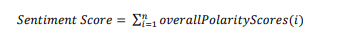

Jika skor sentimen < 0, teks diklasifikasikan sebagai negatif. Oleh karena itu skor sentimen > 0 berarti teks positif, dan skor nol berarti teks tergolong neutral.

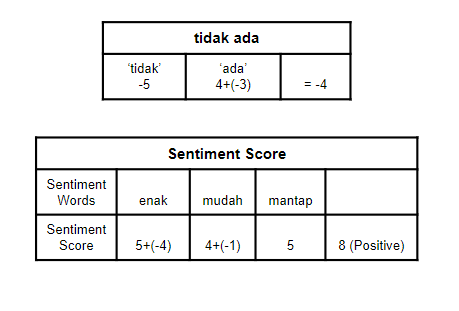

<b>Note :</b>
Bahwa dalam pendekatan berbasis leksikon kami tidak menggunakan model Pembelajaran Mesin: Keseluruhan sentimen teks ditentukan saat itu juga, bergantung hanya pada kamus yang digunakan untuk melabeli kamus kata.

In [22]:
# Load lexicon positive and negative data
lexicon_positive = dict()
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of comment        
def lexiconLabelingText(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positif'
    elif (score < 0):
        polarity = 'negatif'
    else:
        polarity = 'netral'
    return score, polarity

In [23]:
# Results from determine sentiment label of tweets
labeling = data['reply_token'].apply(lexiconLabelingText)
labeling = list(zip(*labeling))
data['label_score'] = labeling[0]
data['label'] = labeling[1]
print(data['label'].value_counts())

negatif    675
netral     369
positif    251
Name: label, dtype: int64


In [40]:
data

,cendekiawan,tweet,reply,reply_token,label_score,label
0,@adywirawan,"Sementara itu, apa suka duka menjelang new nor...",suka duka jelang new normal gelisah yuk malam ...,"[suka, duka, jelang, new, normal, gelisah, yuk...",10,positif
1,NaN,NaN,mantap dok,"[mantap, dok]",9,positif
2,NaN,NaN,dok dosen fav,"[dok, dosen, fav]",9,positif
3,NaN,NaN,broo turah dokter cocok ajak bahas pandemi cov...,"[broo, turah, dokter, cocok, ajak, bahas, pand...",0,netral
4,@dahnilanzar,Kalimat yang hilang adalah tanggungjawab.,kalimat mukzizat inter culluhahaty syehk dont ...,"[kalimat, mukzizat, inter, culluhahaty, syehk,...",-3,negatif
...,...,...,...,...,...,...
1290,NaN,NaN,gas,[gas],-4,negatif
1291,NaN,NaN,hmmmmm,[hmmmmm],0,netral
1292,NaN,NaN,hewan tubuh manusia,"[hewan, tubuh, manusia]",-1,negatif
1293,NaN,NaN,kimak,[kimak],0,netral


# **Step #4 Exploratory Data Analysis**

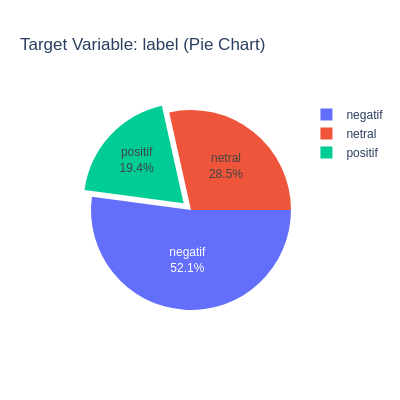

In [24]:
# View the amount of data for each label on the dataset
fig = px.pie(data, names = 'label', width=400, height=400, title = 'Target Variable: label (Pie Chart)')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show('png')

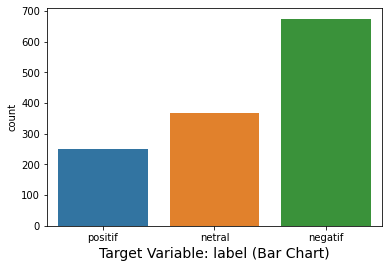

In [27]:
# View the amount of data for each label on the dataset
class_names = ['positif', 'netral', 'negatif']
ax = sns.countplot(data.label)
plt.xlabel('Target Variable: label (Bar Chart)', fontsize=14)
ax.set_xticklabels(class_names)
plt.show()

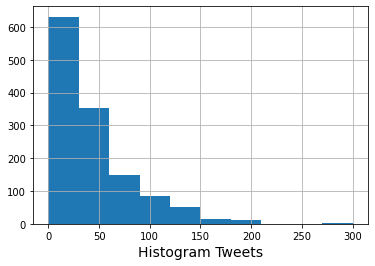

In [28]:
# View distribution histogram of tweets
ax = data['reply'].str.len().hist()
plt.xlabel('Histogram Tweets', fontsize=14)
plt.show()

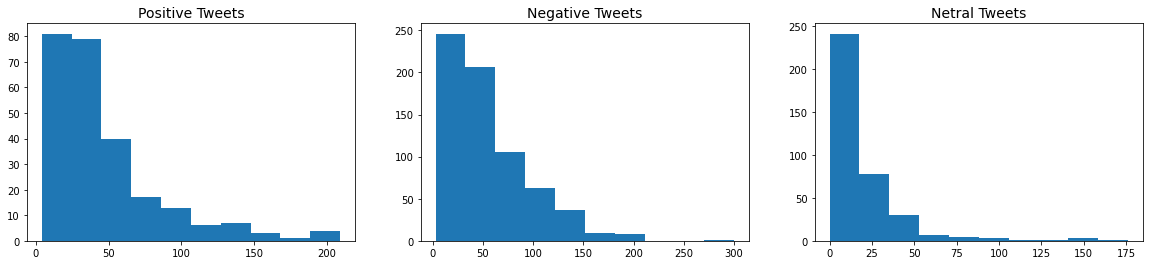

In [29]:
# View distribution histogram tweets of each label
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,4))
ax1.hist(data[data['label']=='positif']['reply'].str.len())
ax1.set_title('Positive Tweets', fontsize=14)
ax2.hist(data[data['label']=='negatif']['reply'].str.len())
ax2.set_title('Negative Tweets', fontsize=14)
ax3.hist(data[data['label']=='netral']['reply'].str.len())
ax3.set_title('Netral Tweets', fontsize=14)
plt.show()

# **Step #5 Modeling & Evaluation**

In [30]:
# 1295 -> amount of dataset final
idx = np.random.randint(0,1295 ,1295)
reduce_data = data.loc[idx]

# Splitting dataset into training and testing
# Data training => data that use for training phase
# Data testing => data that use for testing phase
train_dataset, test_dataset = train_test_split(reduce_data, test_size = 0.3, random_state = 101)
# Menetapkan isi dari variabel train yang termasuk isi dari data training dalam bentuk list
train_data = train_dataset[['cendekiawan', 'tweet', 'reply', 'label']].reset_index().drop('index', axis=1)
# Menetapkan isi dari variabel test yang termasuk isi dari data testing dalam bentuk list
test_data = test_dataset[['cendekiawan', 'tweet', 'reply', 'label']].reset_index().drop('index', axis=1)

In [31]:
# Define dependent and independent variabel
y_test = test_data.label
X_test = test_data.reply
y_train = train_data.label
X_train = train_data.reply

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(906,) (906,)
(389,) (389,)


In [32]:
# Feature extraction
vect = TfidfVectorizer(use_idf=True, max_df=0.8, min_df=2)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

# Standardization
X_train = normalize(X_train)
X_test = normalize(X_test)

print(X_train.shape)
print(X_test.shape)

(906, 1079)
(389, 1079)


In [45]:
# Define model 

NaiveBayes = GaussianNB()

"""
Di bagian ini mendefinisikan nilai dari parameter Naive Bayes dalam bentuk tuple yang 
akan dilihat mana nilai yang menghasilkan hasil terbaik dilakukan dengan 
menggunakan proses GridsearchCV yang sekaligus melakukan validasi

"""
nb_param_grid = {"var_smoothing": [1.e-8,1.e-9,1.e-10]}

# 10 cross validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

tuning_naive_bayes = GridSearchCV(NaiveBayes, nb_param_grid, scoring = 'accuracy', cv=cv, n_jobs = -1, return_train_score=True)

start = time.time()
# Fitting model
sample = class_weight.compute_sample_weight('balanced', y_train)
tuning_naive_bayes = tuning_naive_bayes.fit(X_train.todense(),y_train,sample_weight=sample)
stop = time.time()



print(f"Training time: {stop - start}s")
print('Train Accuracy : %.3f'%tuning_naive_bayes.best_estimator_.score(X_train.todense(),y_train))
print('Best Parameters : ',tuning_naive_bayes.best_params_)
print('\n')

# Gridsearch summary
means = tuning_naive_bayes.cv_results_['mean_test_score']
stds = tuning_naive_bayes.cv_results_['std_test_score']
params = tuning_naive_bayes.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Training time: 1.2358434200286865s
Train Accuracy : 0.953
Best Parameters :  {'var_smoothing': 1e-08}


Mean: 0.789231 Stdev:(0.037052) with: {'var_smoothing': 1e-08}
Mean: 0.789231 Stdev:(0.037052) with: {'var_smoothing': 1e-09}
Mean: 0.789231 Stdev:(0.037052) with: {'var_smoothing': 1e-10}


Testing time: 0.014815330505371094s
Tuning Hyperparameter Naive Bayes accuracy is 79.95%
------------------------------------------------


Classification Report:
              precision    recall  f1-score   support

     negatif     0.8325    0.8154    0.8238       195
      netral     0.7926    0.8917    0.8392       120
     positif     0.7143    0.6081    0.6569        74

    accuracy                         0.7995       389
   macro avg     0.7798    0.7717    0.7733       389
weighted avg     0.7977    0.7995    0.7968       389

------------------------------------------------


Confusion Matrix:


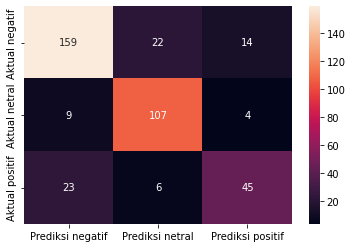

In [48]:
start = time.time()
# Predict model (do testing using data testing)
predicted_tuning_naive_bayes = tuning_naive_bayes.best_estimator_.predict(X_test.todense())
stop = time.time()
print(f"Testing time: {stop - start}s")
# Get accuracy score of predicted model
accuracy_score_nb_tuning = metrics.accuracy_score(predicted_tuning_naive_bayes,y_test)

# Evaluation model
print('Tuning Hyperparameter Naive Bayes accuracy is',str('{:04.2f}'.format(accuracy_score_nb_tuning*100))+'%')
print('------------------------------------------------')
print('\n')
print('Classification Report:')
target_names = ['negatif', 'netral', 'positif']
print(classification_report(y_test, predicted_tuning_naive_bayes, target_names=target_names, digits=4))
print('------------------------------------------------')
print('\n')
print('Confusion Matrix:')
cm = pd.DataFrame(confusion_matrix(y_test, predicted_tuning_naive_bayes),index=["Aktual negatif", "Aktual netral", "Aktual positif"],
columns=["Prediksi negatif", "Prediksi netral", "Prediksi positif"])
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [49]:
# Save the vectorizer
vec_file = 'vectorizer.pkl'
pickle.dump(vect, open(vec_file, 'wb'))

# Save model for prediction new data
pickle.dump(tuning_naive_bayes,open("Tuning-Model-NB.pkl","wb"))

# **Step #6 Prediction Using Data Testing And New Data**

In [50]:
test_data["Prediction"] = predicted_tuning_naive_bayes
test_data

,cendekiawan,tweet,reply,label,Prediction
0,NaN,NaN,bodoh sih jabat negara,negatif,netral
1,NaN,NaN,informasi jokowi yg salah tangga pintu,negatif,positif
2,NaN,NaN,ujung hutang pajak gitu aja,negatif,negatif
3,NaN,NaN,bebas pers legalitas,negatif,negatif
4,NaN,NaN,ajg bgt allah,positif,positif
...,...,...,...,...,...
384,NaN,NaN,kecuali kalo niat emang bikin runyam om,negatif,positif
385,NaN,NaN,dalil poligami cenderung tameng rawan disalahg...,negatif,negatif
386,NaN,NaN,lucu ya akun memed akun anonim jokowi presiden...,positif,negatif
387,NaN,NaN,kontribusi frop indonesia klu bicara kontribus...,netral,negatif


In [51]:
test_negatif = test_data[test_data['Prediction'] == 'negatif']
test_negatif

,cendekiawan,tweet,reply,label,Prediction
2,NaN,NaN,ujung hutang pajak gitu aja,negatif,negatif
3,NaN,NaN,bebas pers legalitas,negatif,negatif
7,NaN,NaN,ha ha ha hai polisi sosmed gk tarik bersih sos...,negatif,negatif
8,NaN,NaN,ngga ketar tir klo rumah wkwkwkwk,negatif,negatif
9,NaN,NaN,wottt didik masyarakat sulit introspeksi orang...,negatif,negatif
...,...,...,...,...,...
382,NaN,NaN,yg bonyok pantes bonyok mulut nya sampah congo...,netral,negatif
385,NaN,NaN,dalil poligami cenderung tameng rawan disalahg...,negatif,negatif
386,NaN,NaN,lucu ya akun memed akun anonim jokowi presiden...,positif,negatif
387,NaN,NaN,kontribusi frop indonesia klu bicara kontribus...,netral,negatif


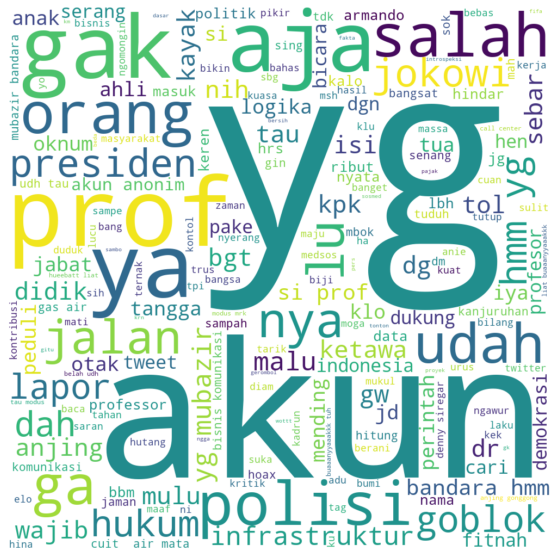

In [53]:
words = ' '.join(test_negatif["reply"])

wordcloud = WordCloud(width=1000, height=1000, mode='RGBA', background_color='white').generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordcloud.to_file('Negatif.png')
plt.show()

In [54]:
test_positif = test_data[test_data['Prediction'] == 'positif']
test_positif

,cendekiawan,tweet,reply,label,Prediction
1,NaN,NaN,informasi jokowi yg salah tangga pintu,negatif,positif
4,NaN,NaN,ajg bgt allah,positif,positif
5,NaN,NaN,emosi bener liat,positif,positif
6,NaN,NaN,masuk yg hidup,negatif,positif
14,NaN,NaN,inspeksi lihat tangga curam pintu gerbang,positif,positif
...,...,...,...,...,...
348,NaN,NaN,shalat duha prof,positif,positif
356,NaN,NaN,beliau non muslim make peci muslim pake al qur...,positif,positif
361,NaN,NaN,emosi bener liat,positif,positif
377,NaN,NaN,charge this person usd month,netral,positif


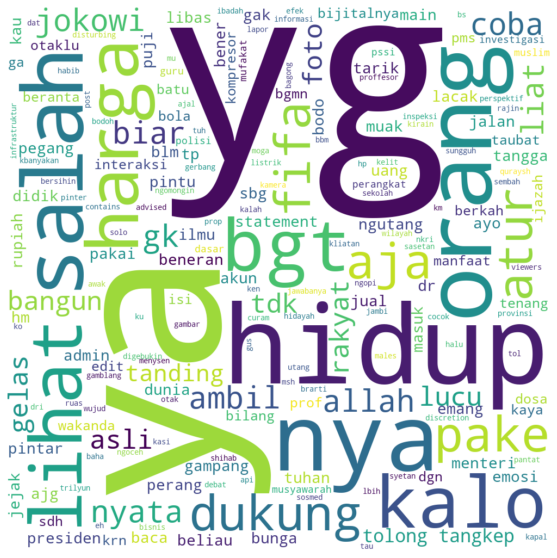

In [55]:
words = ' '.join(test_positif["reply"])

wordcloud = WordCloud(width=1000, height=1000, mode='RGBA', background_color='white').generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordcloud.to_file('Positif.png')
plt.show()

In [56]:
test_netral = test_data[test_data['Prediction'] == 'netral']
test_netral

,cendekiawan,tweet,reply,label,Prediction
0,NaN,NaN,bodoh sih jabat negara,negatif,netral
10,NaN,NaN,buzzerrp,netral,netral
15,NaN,NaN,,netral,netral
18,NaN,NaN,,netral,netral
24,NaN,NaN,dibantuin,netral,netral
...,...,...,...,...,...
369,NaN,NaN,maju kena mundur kena truf pegang ya jalan aja,negatif,netral
372,NaN,NaN,piara mprof,netral,netral
378,@saiful_mujani,biasanya orang pada menjauhi orang yang sedang...,bau nya sih,negatif,netral
379,NaN,NaN,,netral,netral


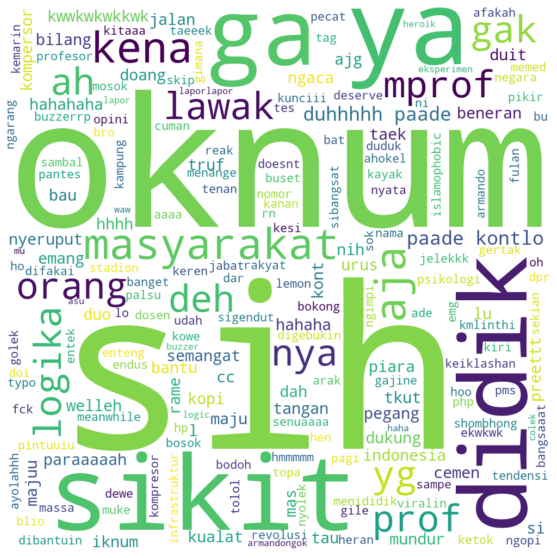

In [57]:
words = ' '.join(test_netral["reply"])

wordcloud = WordCloud(width=1000, height=1000, mode='RGBA', background_color='white').generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordcloud.to_file('Netral.png')
plt.show()

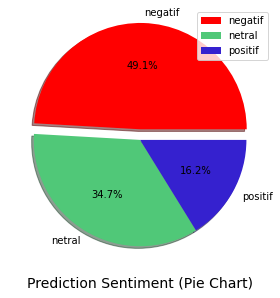

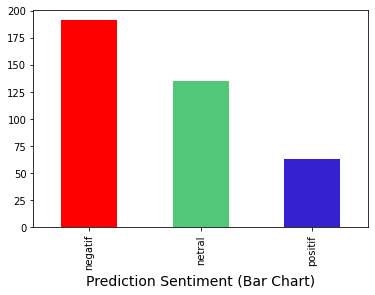

In [58]:
# Data to plot
labels = ['negatif', 'netral', 'positif']
colors = ('#FF0000', '#50C878', '#3521cf')
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
fig, ax = plt.subplots()
ax.pie(test_data.Prediction.value_counts(), labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors=colors)
ax.legend(labels, loc='best')
ax.set_aspect('equal')
plt.tight_layout()
plt.xlabel('Prediction Sentiment (Pie Chart)', fontsize=14)
plt.show()

# Menampilkan grafik review berdasarkan sentiment dalam bentuk grafik bar
test_data['Prediction'].value_counts(dropna=False).sort_index().plot(kind='bar', color=['#FF0000', '#50C878', '#3521cf'])
plt.xlabel('Prediction Sentiment (Bar Chart)', fontsize=14)
plt.show()

In [62]:
def text_preprocessing(text): 
    text = remove_text_special(text)
    text = remove_emoji(text)
    # Tokenizing
    tokens = word_tokenize(text)
    # Removing stop words
    stopwords = stopword_removal(tokens)
    # Create Stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in stopwords]
    return " ".join(stemmed_tokens).strip().lower()

# Remove special text
def remove_text_special(text):
    # Remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '',str(text))
    # Replace kata yang berulang-ulang ('oooooo' menjadi '00')
    text = re.sub(r'(.)\1+', r'\1\1', text)
    # Replace 2+ dots with space
    text = re.sub(r'\.{2,}', ' ', text)
    # Remove @username
    text = re.sub('@[^\s]+','',text)
    # Remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)
    # Remove angka
    text = re.sub('[0-9]+', '', text)
    # Remove url
    text = re.sub(r"http\S+", "", text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Strip space, " and ' from tweet
    text = text.strip(' "\'')
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Remove punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    # Remove character 
    text = text.replace("\n",' ').replace("Diterjemahkan oleh Google",' ').replace("Asli",' ')
    # Remove url uncomplete
    return text.replace("http://", " ").replace("https://", " ")

# Remove emoticon
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002500-\U00002BEF"  # chinese char
                                u"\U00002702-\U000027B0"
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u"\U00010000-\U0010ffff"
                                u"\u2640-\u2642"
                                u"\u2600-\u2B55"
                                u"\u200d"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\ufe0f"  # dingbats
                                u"\u3030"
                                "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    encoded_string = text.encode("ascii", "ignore")
    text = encoded_string.decode()

    return(text)

# Stopword Function
def stopword_removal(text):
    filtering = stopwords.words('indonesian')
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, text)
    for x in fit:
        data.append(x)
    return data

In [66]:
def sentiment_analysis(text, model):
    
    # Predicting sentiment
    text_prep = text_preprocessing(text)
    text_matrix = vectorizer.transform([text_prep])
    pred = model.predict(text_matrix.todense())
    proba = model.predict_proba(text_matrix.todense())
    
    # Plotting the sentiment and its score
    fig, ax = plt.subplots(figsize=(5, 3))
    
    if pred.argmax() == 0 :
        text = 'Negatif'
        class_proba = int(proba[0][0].round(2)*100)
        color = 'Crimson'
        
    elif pred.argmax() == 1 :
        text = 'Netral'
        class_proba = int(proba[0][1].round(2)*100) 
        color = 'Lightgrey'
       
    elif pred.argmax() == 2 :
        text = 'Positif'
        class_proba = int(proba[0][2].round(2)*100) 
        color = 'DeepSkyBlue'
        
    ax.text(0.5, 0.5, text, fontsize=50, ha='center', color=color)
    ax.text(0.5, 0.20, str(class_proba) + '%', fontsize=14, ha='center')
    ax.axis('off')
    ax.set_title('Sentiment Analysis', fontsize=14)
    plt.show()

In [64]:
# Load the model NB and vectorizer
filename = 'Tuning-Model-NB.pkl'
classifier = pickle.load(open(filename, 'rb'))

filename = 'vectorizer.pkl'
vectorizer = pickle.load(open(filename, 'rb'))

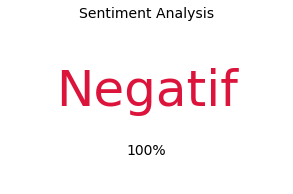

In [67]:
comment = """
             Banyak yang salah faham. Padahal dokter lagi ngomongin resiko. 
             Jangankan naik motor, bayi di mobil ga pakai carseat pun akan bahaya. 
             Nyatanya berapa banyak orangtua yang biarin anaknya gujlak-gajluk di dalam mobil? 
             Jadi masalahnya di orangtua faham resiko atau ngga?
          """
sentiment_analysis(comment, model=classifier)

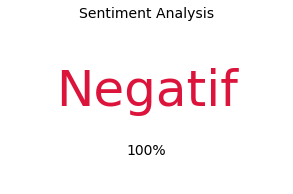

In [68]:
comment = """
             @dr_koko Corona itu menurut saya penyakit ringan saja. 
             Menjadi berat atau berbahaya itu combinasi ya atau indikasinya saja.
             apa saja jika sudah berindikasi sesuatu yg ringan bisa jadi berbahaya.
          """
sentiment_analysis(comment, model=classifier)

In [69]:
new_data = pd.read_csv('dcsains.csv')
new_data

,Cendekiawan,Tweet,reply
0,@dr_koko28,Corona yang menyebar itu belum ada anti-virusn...,@dr_koko28\nSatu twit legendaris gw yang dibac...
1,NaN,NaN,@dr_koko28\nBerarti kalo kena tinggal tunggu i...
2,NaN,NaN,@Dennaaja_\r\nGak juga. Ada juga yang diinfoka...
3,NaN,NaN,@dr_koko28 Ada yang bilang omong kosong kok do...
4,NaN,NaN,@rerewant\nSuruh dia yg rawat pasien
...,...,...,...
473,NaN,NaN,Andatu sama Rosa pdktnya gimana ya... Penasara...
474,NaN,NaN,"lucu bgt baby nya, sehat sehat yaa"
475,NaN,NaN,Waaaahhhh lucuu!! Panjang umur baby rhinoooo ❤
476,NaN,NaN,Mommy Rosa itu usia berapa ya?🥺 keliatan badak...


In [71]:
# Predicting sentiment
new_data['reply'] = new_data['reply'].apply(text_preprocessing)
text_matrix = vectorizer.transform(new_data['reply'])
pred = classifier.predict(text_matrix.todense())

# Remove data that have NAN value in column reply
new_data.dropna(subset=['reply'], inplace = True)
# To reset the index when data with NAN values ​​are removed so that the index numbering matches
new_data = new_data.reset_index(drop = True)
# Print the results of the dataframe that has been created
new_data["prediction"] = pred
new_data

,Cendekiawan,Tweet,reply,prediction
0,@dr_koko28,Corona yang menyebar itu belum ada anti-virusn...,satu twit legendaris gw baca juta netijen bent...,negatif
1,NaN,NaN,arti kalo kena tinggal tunggu innalillahi aja ...,negatif
2,NaN,NaN,gak ada info sembuh ngandelin daya tahan tubuh,negatif
3,NaN,NaN,ada bilang omong kosong dok corona gimana nih,positif
4,NaN,NaN,suruh yg rawat pasien,negatif
...,...,...,...,...
473,NaN,NaN,andatu rosa pdktnya gimana ya penasaran btw se...,negatif
474,NaN,NaN,lucu bgt baby nya sehat sehat yaa,positif
475,NaN,NaN,waahh lucuu panjang umur baby rhinoo,netral
476,NaN,NaN,mommy rosa usia ya liat badak udah umur keren ...,negatif
